# 우리 동네 인구 구조 시각화 하기
https://jumin.mois.go.kr/index.jsp#


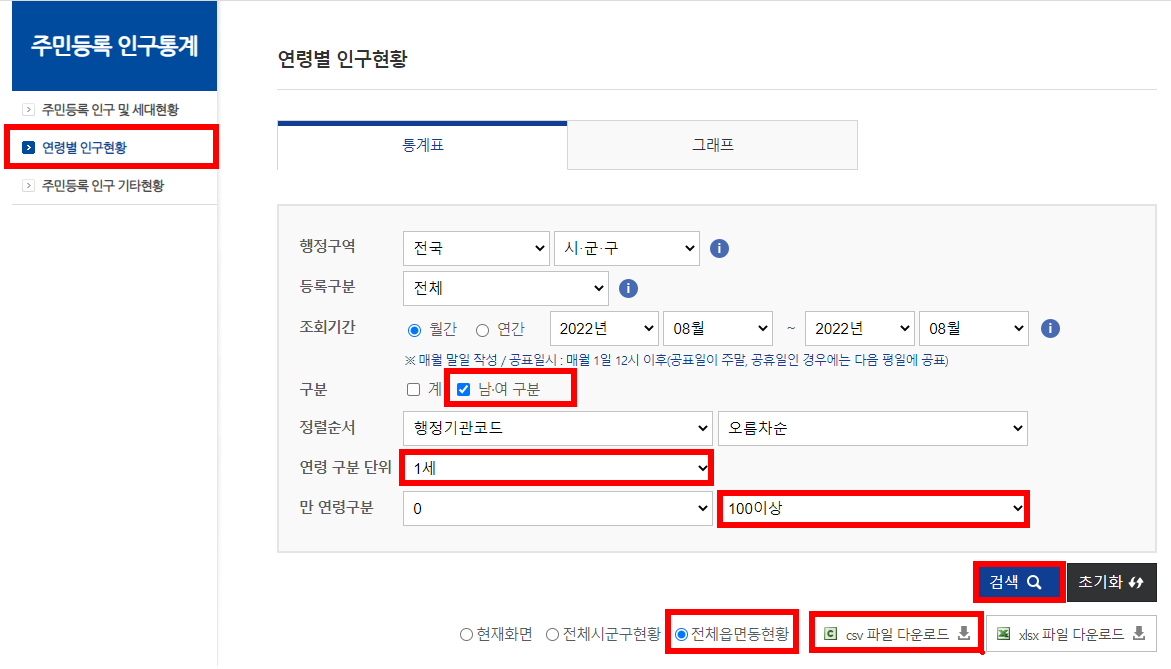

## 데이터 기초 정보 파악

In [ ]:
#라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 데이터 로드
#  df = pd.read_csv('./data/population.csv',encoding='utf-8-sig')
# df = pd.read_csv('./data/population.csv',encoding='utf-8')
df = pd.read_csv('/content/drive/MyDrive/dev_work/population.csv',encoding='euc-kr') # default: utf-8,)
# df = pd.read_csv('./data/population.csv',encoding='cp949')


In [ ]:
df.head()

,행정구역,2022년08월_남_총인구수,2022년08월_남_연령구간인구수,2022년08월_남_0세,2022년08월_남_1세,2022년08월_남_2세,2022년08월_남_3세,2022년08월_남_4세,2022년08월_남_5세,2022년08월_남_6세,...,2022년08월_여_91세,2022년08월_여_92세,2022년08월_여_93세,2022년08월_여_94세,2022년08월_여_95세,2022년08월_여_96세,2022년08월_여_97세,2022년08월_여_98세,2022년08월_여_99세,2022년08월_여_100세 이상
0,서울특별시 (1100000000),"4,601,295","4,601,295","21,115","23,013","23,458","25,684","26,926","29,115","33,125",...,"5,718","4,987","4,157","3,135","2,326","1,504","1,032",773,704,"1,292"
1,서울특별시 종로구 (1111000000),"69,408","69,408",232,248,270,261,299,320,426,...,126,104,78,77,49,29,20,13,15,28
2,서울특별시 종로구 청운효자동(1111051500),"5,392","5,392",24,24,28,21,27,44,47,...,13,4,6,5,2,3,0,2,1,2
3,서울특별시 종로구 사직동(1111053000),"4,124","4,124",17,14,15,21,24,30,37,...,13,8,8,3,2,4,3,0,3,0
4,서울특별시 종로구 삼청동(1111054000),"1,130","1,130",2,3,2,2,4,4,6,...,1,5,0,2,0,0,1,0,0,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3867 entries, 0 to 3866
Columns: 207 entries, 행정구역 to 2022년08월_여_100세 이상
dtypes: int64(8), object(199)
memory usage: 6.1+ MB


In [ ]:
df.columns

Index(['행정구역', '2022년08월_남_총인구수', '2022년08월_남_연령구간인구수', '2022년08월_남_0세',
       '2022년08월_남_1세', '2022년08월_남_2세', '2022년08월_남_3세', '2022년08월_남_4세',
       '2022년08월_남_5세', '2022년08월_남_6세',
       ...
       '2022년08월_여_91세', '2022년08월_여_92세', '2022년08월_여_93세', '2022년08월_여_94세',
       '2022년08월_여_95세', '2022년08월_여_96세', '2022년08월_여_97세', '2022년08월_여_98세',
       '2022년08월_여_99세', '2022년08월_여_100세 이상'],
      dtype='object', length=207)

In [ ]:
for col in df.columns:
    print(col)

행정구역
2022년08월_남_총인구수
2022년08월_남_연령구간인구수
2022년08월_남_0세
2022년08월_남_1세
2022년08월_남_2세
2022년08월_남_3세
2022년08월_남_4세
2022년08월_남_5세
2022년08월_남_6세
2022년08월_남_7세
2022년08월_남_8세
2022년08월_남_9세
2022년08월_남_10세
2022년08월_남_11세
2022년08월_남_12세
2022년08월_남_13세
2022년08월_남_14세
2022년08월_남_15세
2022년08월_남_16세
2022년08월_남_17세
2022년08월_남_18세
2022년08월_남_19세
2022년08월_남_20세
2022년08월_남_21세
2022년08월_남_22세
2022년08월_남_23세
2022년08월_남_24세
2022년08월_남_25세
2022년08월_남_26세
2022년08월_남_27세
2022년08월_남_28세
2022년08월_남_29세
2022년08월_남_30세
2022년08월_남_31세
2022년08월_남_32세
2022년08월_남_33세
2022년08월_남_34세
2022년08월_남_35세
2022년08월_남_36세
2022년08월_남_37세
2022년08월_남_38세
2022년08월_남_39세
2022년08월_남_40세
2022년08월_남_41세
2022년08월_남_42세
2022년08월_남_43세
2022년08월_남_44세
2022년08월_남_45세
2022년08월_남_46세
2022년08월_남_47세
2022년08월_남_48세
2022년08월_남_49세
2022년08월_남_50세
2022년08월_남_51세
2022년08월_남_52세
2022년08월_남_53세
2022년08월_남_54세
2022년08월_남_55세
2022년08월_남_56세
2022년08월_남_57세
2022년08월_남_58세
2022년08월_남_59세
2022년08월_남_60세
2022년08월_남_61세
2022년08월_남_62세
2022년08월_남_63세
2022년08월_남

In [ ]:
#컬럼명 2022년08월_ 삭제

df.columns.str.replace('2022년08월_','')


Index(['행정구역', '남_총인구수', '남_연령구간인구수', '남_0세', '남_1세', '남_2세', '남_3세', '남_4세',
       '남_5세', '남_6세',
       ...
       '여_91세', '여_92세', '여_93세', '여_94세', '여_95세', '여_96세', '여_97세', '여_98세',
       '여_99세', '여_100세 이상'],
      dtype='object', length=207)

In [ ]:
df.columns

Index(['행정구역', '2022년08월_남_총인구수', '2022년08월_남_연령구간인구수', '2022년08월_남_0세',
       '2022년08월_남_1세', '2022년08월_남_2세', '2022년08월_남_3세', '2022년08월_남_4세',
       '2022년08월_남_5세', '2022년08월_남_6세',
       ...
       '2022년08월_여_91세', '2022년08월_여_92세', '2022년08월_여_93세', '2022년08월_여_94세',
       '2022년08월_여_95세', '2022년08월_여_96세', '2022년08월_여_97세', '2022년08월_여_98세',
       '2022년08월_여_99세', '2022년08월_여_100세 이상'],
      dtype='object', length=207)

In [ ]:
df.columns = df.columns.str.replace('2022년08월_','')

In [ ]:
df.columns

Index(['행정구역', '남_총인구수', '남_연령구간인구수', '남_0세', '남_1세', '남_2세', '남_3세', '남_4세',
       '남_5세', '남_6세',
       ...
       '여_91세', '여_92세', '여_93세', '여_94세', '여_95세', '여_96세', '여_97세', '여_98세',
       '여_99세', '여_100세 이상'],
      dtype='object', length=207)

In [ ]:
df.head()

,행정구역,남_총인구수,남_연령구간인구수,남_0세,남_1세,남_2세,남_3세,남_4세,남_5세,남_6세,...,여_91세,여_92세,여_93세,여_94세,여_95세,여_96세,여_97세,여_98세,여_99세,여_100세 이상
0,서울특별시 (1100000000),"4,601,295","4,601,295","21,115","23,013","23,458","25,684","26,926","29,115","33,125",...,"5,718","4,987","4,157","3,135","2,326","1,504","1,032",773,704,"1,292"
1,서울특별시 종로구 (1111000000),"69,408","69,408",232,248,270,261,299,320,426,...,126,104,78,77,49,29,20,13,15,28
2,서울특별시 종로구 청운효자동(1111051500),"5,392","5,392",24,24,28,21,27,44,47,...,13,4,6,5,2,3,0,2,1,2
3,서울특별시 종로구 사직동(1111053000),"4,124","4,124",17,14,15,21,24,30,37,...,13,8,8,3,2,4,3,0,3,0
4,서울특별시 종로구 삼청동(1111054000),"1,130","1,130",2,3,2,2,4,4,6,...,1,5,0,2,0,0,1,0,0,2


In [ ]:
#전처리한 데이터프레임 저장

# df.to_csv('./data/population_new.csv')
df.to_csv('/content/drive/MyDrive/dev_work/population_new.csv', index = False) #index 제외하고 저장하기

In [ ]:
# new_df=pd.read_csv('./data/population_new.csv',index_col=0)

# new_df.head()

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dev_work/population_new.csv')
df.head()

,행정구역,남_총인구수,남_연령구간인구수,남_0세,남_1세,남_2세,남_3세,남_4세,남_5세,남_6세,...,여_91세,여_92세,여_93세,여_94세,여_95세,여_96세,여_97세,여_98세,여_99세,여_100세 이상
0,서울특별시 (1100000000),"4,601,295","4,601,295","21,115","23,013","23,458","25,684","26,926","29,115","33,125",...,"5,718","4,987","4,157","3,135","2,326","1,504","1,032",773,704,"1,292"
1,서울특별시 종로구 (1111000000),"69,408","69,408",232,248,270,261,299,320,426,...,126,104,78,77,49,29,20,13,15,28
2,서울특별시 종로구 청운효자동(1111051500),"5,392","5,392",24,24,28,21,27,44,47,...,13,4,6,5,2,3,0,2,1,2
3,서울특별시 종로구 사직동(1111053000),"4,124","4,124",17,14,15,21,24,30,37,...,13,8,8,3,2,4,3,0,3,0
4,서울특별시 종로구 삼청동(1111054000),"1,130","1,130",2,3,2,2,4,4,6,...,1,5,0,2,0,0,1,0,0,2


In [ ]:
#남자만 출력

df.iloc[ : , 3:104]

,남_0세,남_1세,남_2세,남_3세,남_4세,남_5세,남_6세,남_7세,남_8세,남_9세,...,남_91세,남_92세,남_93세,남_94세,남_95세,남_96세,남_97세,남_98세,남_99세,남_100세 이상
0,"21,115","23,013","23,458","25,684","26,926","29,115","33,125","34,405","34,172","35,784",...,"2,102","1,649","1,474",978,664,392,301,240,246,414
1,232,248,270,261,299,320,426,399,415,451,...,52,37,44,13,26,18,12,9,8,15
2,24,24,28,21,27,44,47,44,46,51,...,2,3,1,0,4,1,3,1,0,1
3,17,14,15,21,24,30,37,45,24,36,...,3,1,10,2,4,4,2,2,1,1
4,2,3,2,2,4,4,6,7,4,7,...,2,2,1,1,2,1,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,37,41,44,52,51,58,74,86,75,80,...,4,1,1,1,0,0,0,1,0,1
3863,63,76,92,80,82,86,86,103,89,81,...,4,3,1,2,0,0,0,0,0,0
3864,57,56,64,63,86,93,107,101,88,92,...,2,1,0,1,1,1,0,0,0,1
3865,41,28,53,45,44,49,62,68,47,67,...,4,1,4,0,0,1,0,0,0,0


In [ ]:
#여자만 출력
df.iloc[ :,106:    ]

,여_0세,여_1세,여_2세,여_3세,여_4세,여_5세,여_6세,여_7세,여_8세,여_9세,...,여_91세,여_92세,여_93세,여_94세,여_95세,여_96세,여_97세,여_98세,여_99세,여_100세 이상
0,"19,816","21,718","22,053","23,561","25,352","27,939","31,868","32,984","32,286","33,944",...,"5,718","4,987","4,157","3,135","2,326","1,504","1,032",773,704,"1,292"
1,212,236,260,284,281,336,395,382,445,440,...,126,104,78,77,49,29,20,13,15,28
2,24,22,20,31,25,36,39,44,53,44,...,13,4,6,5,2,3,0,2,1,2
3,17,16,21,22,21,33,32,24,48,29,...,13,8,8,3,2,4,3,0,3,0
4,2,4,3,3,9,4,6,6,6,7,...,1,5,0,2,0,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,42,40,34,51,61,66,82,89,84,86,...,8,3,4,6,0,2,0,0,2,1
3863,58,47,58,61,74,89,80,93,69,89,...,11,14,6,6,5,4,2,1,5,7
3864,43,46,54,57,64,86,104,90,112,72,...,8,17,3,8,4,4,0,1,1,2
3865,36,35,35,48,36,45,59,56,65,70,...,8,9,9,6,4,4,1,0,2,2


In [ ]:
df.isnull().sum().sum() #결측치 0건

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3867 entries, 0 to 3866
Columns: 207 entries, 행정구역 to 여_100세 이상
dtypes: int64(8), object(199)
memory usage: 6.1+ MB


In [ ]:
# df.astype('int64')

In [ ]:
# df.iloc[:,1:].astype('int64')

## 데이터 전처리
* 불필요 데이터 삭제
* 컬럼0번째를 인덱스로 설정

In [ ]:
# 행정구역을 index_col로 정하고 로드
df=pd.read_csv('/content/drive/MyDrive/dev_work/population_new.csv',index_col=0, thousands=',')

df.head()

,남_총인구수,남_연령구간인구수,남_0세,남_1세,남_2세,남_3세,남_4세,남_5세,남_6세,남_7세,...,여_91세,여_92세,여_93세,여_94세,여_95세,여_96세,여_97세,여_98세,여_99세,여_100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),4601295,4601295,21115,23013,23458,25684,26926,29115,33125,34405,...,5718,4987,4157,3135,2326,1504,1032,773,704,1292
서울특별시 종로구 (1111000000),69408,69408,232,248,270,261,299,320,426,399,...,126,104,78,77,49,29,20,13,15,28
서울특별시 종로구 청운효자동(1111051500),5392,5392,24,24,28,21,27,44,47,44,...,13,4,6,5,2,3,0,2,1,2
서울특별시 종로구 사직동(1111053000),4124,4124,17,14,15,21,24,30,37,45,...,13,8,8,3,2,4,3,0,3,0
서울특별시 종로구 삼청동(1111054000),1130,1130,2,3,2,2,4,4,6,7,...,1,5,0,2,0,0,1,0,0,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3867 entries, 서울특별시  (1100000000) to 제주특별자치도 서귀포시 예래동(5013062000)
Columns: 206 entries, 남_총인구수 to 여_100세 이상
dtypes: int64(206)
memory usage: 6.1+ MB


> **[데이터에 대한 질문]**
> * 종로구의 인구구조는 어떨까?
> * 부산시 남구 문현동의 인구구조는 어떨가?
>   
>   

In [ ]:
# 불필요한 데이터 삭제
#남_총인구수,남_연령구간인구수
#여_총인구수,여_연령구간인구수
del df['남_총인구수'], df['남_연령구간인구수']
del df['여_총인구수'], df['여_연령구간인구수']

In [ ]:
df.head()

,남_0세,남_1세,남_2세,남_3세,남_4세,남_5세,남_6세,남_7세,남_8세,남_9세,...,여_91세,여_92세,여_93세,여_94세,여_95세,여_96세,여_97세,여_98세,여_99세,여_100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),21115,23013,23458,25684,26926,29115,33125,34405,34172,35784,...,5718,4987,4157,3135,2326,1504,1032,773,704,1292
서울특별시 종로구 (1111000000),232,248,270,261,299,320,426,399,415,451,...,126,104,78,77,49,29,20,13,15,28
서울특별시 종로구 청운효자동(1111051500),24,24,28,21,27,44,47,44,46,51,...,13,4,6,5,2,3,0,2,1,2
서울특별시 종로구 사직동(1111053000),17,14,15,21,24,30,37,45,24,36,...,13,8,8,3,2,4,3,0,3,0
서울특별시 종로구 삼청동(1111054000),2,3,2,2,4,4,6,7,4,7,...,1,5,0,2,0,0,1,0,0,2


In [ ]:
name = '아름동'

In [ ]:
# 아름동이 있는지 확인
mytown = df[df.index.str.contains('아름동')]

# 우리동네 연령별 인구구조
* 남, 여 데이터 각각 추출

In [ ]:
#남여 데이터 추출
male = mytown.iloc[:,0:101]
female = mytown.iloc[:,101:202]

In [ ]:
male.shape, female.shape

((1, 101), (1, 101))

In [ ]:
#연령별 남여 합계 계산
total = []

for i in range(0,101):
    # print(male.iloc[0,i])
    
    total.append(male.iloc[0,i] + female.iloc[0,i])
    
    

In [ ]:
male.iloc[0,0], female.iloc[0,0]

(97, 81)

In [ ]:
total[0]

178

## line 차트

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47492 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51312 missing from current font.
  font.set_

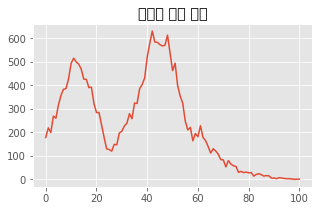

In [ ]:
name = '아름동'
plt.figure(figsize=(5,3)) #figure 사이즈 조절
plt.style.use('ggplot')
plt.rc('font', family = "Malgun Gothic") #한글사용
plt.rcParams['axes.unicode_minus']=False #마이너스 부호 깨짐

plt.title('{} 인구 구조'.format(name))

plt.plot(total)

plt.show()

> * 젊은 부부가 많이 사는 동네로 보입니다. 
> * 어린아이와 40대가 많이 살고 있고, 
> * 반면 노년층이 적습니다. 

---
## 종합코드


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47492 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51312 missing from current font.
  font.set_

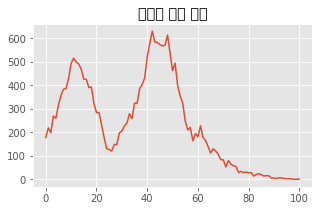

In [ ]:
# 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/dev_work/population.csv',encoding='euc-kr')
# 전처리

# 행정구역을 index_col로 정하고 로드
df=pd.read_csv('/content/drive/MyDrive/dev_work/population_new.csv',index_col=0, thousands=',')

# 동네이름 ()
mytown = df[df.index.str.contains('괴정동')]
# 시각화
name = '아름동'
plt.figure(figsize=(5,3)) #figure 사이즈 조절
plt.style.use('ggplot')
plt.rc('font', family = "Malgun Gothic") #한글사용
plt.rcParams['axes.unicode_minus']=False #마이너스 부호 깨짐

plt.title('{} 인구 구조'.format(name))

plt.plot(total)

plt.show()
# 분석내용~~

## Bar 차트
* bar차트는 두 종류의 값들이 입력됩니다. 
* bar(막대를 표시할 위치, 막대 높이)
* 두 종류의 값들은 개수가 일치해야 합니다. 

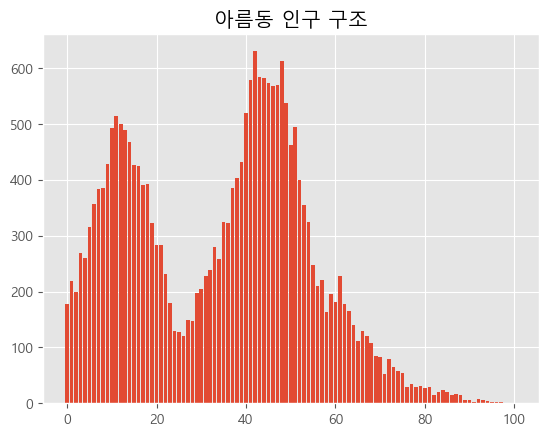

In [ ]:
plt.figure()
# plt.style.use('ggplot')
plt.rc('font', family = "Malgun Gothic") #한글사용
plt.rcParams['axes.unicode_minus']=False #마이너스 부호 깨짐

plt.title('{} 인구 구조'.format(name))

plt.bar(range(101),total)


plt.show()

## barh 차트

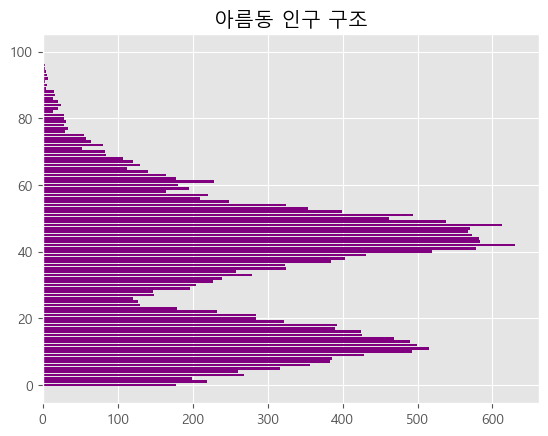

In [ ]:

plt.figure()
# plt.style.use('ggplot')
plt.rc('font', family = "Malgun Gothic") #한글사용
plt.rcParams['axes.unicode_minus']=False #마이너스 부호 깨짐

plt.title('{} 인구 구조'.format(name))

plt.barh(range(101), total, color='purple')

plt.show()

## 진짜 우리동네 인구구조

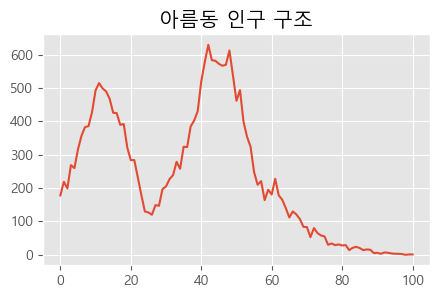

In [ ]:
# 데이터 로드
df = pd.read_csv('./data/population.csv',encoding='euc-kr')
# 전처리

# 행정구역을 index_col로 정하고 로드
df=pd.read_csv('./data/population_new.csv',index_col=0, thousands=',')

# 동네이름 ()
mytown = df[df.index.str.contains('아름동')]
# 시각화
name = '아름동'
plt.figure(figsize=(5,3)) #figure 사이즈 조절
plt.style.use('ggplot')
plt.rc('font', family = "Malgun Gothic") #한글사용
plt.rcParams['axes.unicode_minus']=False #마이너스 부호 깨짐

plt.title('{} 인구 구조'.format(name))

plt.plot(total)

plt.show()
# 분석내용~~


>* 30대부터 50대까지의 인구가 가장 많음
>* 0세부터 20대 초의 인구 역시 많음
>* 20대 초반부터 20대 중반의 인구 적음.

# 우리동네 남여 구조 

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text

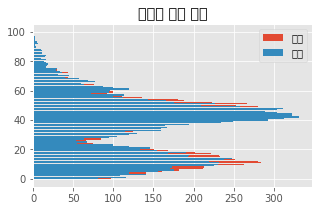

In [ ]:
#라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 행정구역을 index_col로 정하고 로드
df=pd.read_csv('/content/drive/MyDrive/dev_work/population_new.csv',index_col=0, thousands=',')
# 불필요한 데이터 삭제
#남_총인구수,남_연령구간인구수
#여_총인구수,여_연령구간인구수
del df['남_총인구수'], df['남_연령구간인구수']
del df['여_총인구수'], df['여_연령구간인구수']
name = '아름동'
mytown = df[df.index.str.contains(name)]
#남여 데이터 추출
male = mytown.iloc[:,0:101]
female = mytown.iloc[:,101:202]
#시각화
plt.figure(figsize=(5,3))
# plt.style.use('ggplot')
plt.rc('font', family = "Malgun Gothic") #한글사용
plt.rcParams['axes.unicode_minus']=False #마이너스 부호 깨짐

plt.title('{} 인구 구조'.format(name))

plt.barh(range(101), male.iloc[0], label='남성')
plt.barh(range(101), female.iloc[0], label='여성')

plt.legend()
plt.show()


In [ ]:
male.head()

,남_0세,남_1세,남_2세,남_3세,남_4세,남_5세,남_6세,남_7세,남_8세,남_9세,...,남_91세,남_92세,남_93세,남_94세,남_95세,남_96세,남_97세,남_98세,남_99세,남_100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,
세종특별자치시 아름동(3611053000),97,103,91,128,141,160,182,212,213,203,...,0,1,1,2,1,0,0,0,0,1


In [ ]:
 female.head()

,여_0세,여_1세,여_2세,여_3세,여_4세,여_5세,여_6세,여_7세,여_8세,여_9세,...,여_91세,여_92세,여_93세,여_94세,여_95세,여_96세,여_97세,여_98세,여_99세,여_100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,
세종특별자치시 아름동(3611053000),81,116,108,141,119,156,175,171,173,225,...,3,6,5,2,2,3,2,0,1,0


## 모든 값 음수로 변환

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47492 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51312 missing from current font.
  font.set_

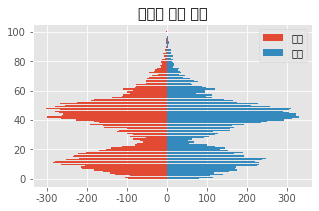

In [ ]:
#라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 행정구역을 index_col로 정하고 로드
df=pd.read_csv('/content/drive/MyDrive/dev_work/population_new.csv',index_col=0, thousands=',')
# 불필요한 데이터 삭제
#남_총인구수,남_연령구간인구수
#여_총인구수,여_연령구간인구수
del df['남_총인구수'], df['남_연령구간인구수']
del df['여_총인구수'], df['여_연령구간인구수']
name = '아름동'
mytown = df[df.index.str.contains(name)]

#남여 데이터 추출
male = mytown.iloc[:,0:101]
female = mytown.iloc[:,101:202]

#남자
temp = male * -1

#시각화
plt.figure(figsize=(5,3))
# plt.style.use('ggplot')
plt.rc('font', family = "Malgun Gothic") #한글사용
plt.rcParams['axes.unicode_minus']=False #마이너스 부호 깨짐

plt.title('{} 인구 구조'.format(name))

plt.barh(range(101), temp.iloc[0], label='남성')
plt.barh(range(101), female.iloc[0], label='여성')

plt.legend()
plt.show()


In [ ]:
male*-1

,남_0세,남_1세,남_2세,남_3세,남_4세,남_5세,남_6세,남_7세,남_8세,남_9세,...,남_91세,남_92세,남_93세,남_94세,남_95세,남_96세,남_97세,남_98세,남_99세,남_100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,
세종특별자치시 아름동(3611053000),-97,-103,-91,-128,-141,-160,-182,-212,-213,-203,...,0,-1,-1,-2,-1,0,0,0,0,-1


> **[해석]**
> *    ㅇㅇㅇ

## 진짜 우리동네 남여 구조

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51312 missing from current font.
  font.set_

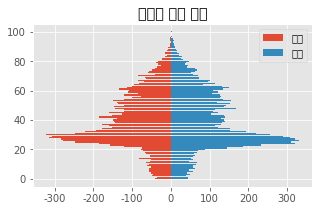

In [ ]:
#라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 행정구역을 index_col로 정하고 로드
df=pd.read_csv('/content/drive/MyDrive/dev_work/population_new.csv',index_col=0, thousands=',')
# 불필요한 데이터 삭제
#남_총인구수,남_연령구간인구수
#여_총인구수,여_연령구간인구수
del df['남_총인구수'], df['남_연령구간인구수']
del df['여_총인구수'], df['여_연령구간인구수']
name = '괴정동'
mytown = df[df.index.str.contains(name)]

#남여 데이터 추출
male = mytown.iloc[:,0:101]
female = mytown.iloc[:,101:202]

#남자
temp = male * -1

#시각화
plt.figure(figsize=(5,3))
# plt.style.use('ggplot')
plt.rc('font', family = "Malgun Gothic") #한글사용
plt.rcParams['axes.unicode_minus']=False #마이너스 부호 깨짐

plt.title('{} 인구 구조'.format(name))

plt.barh(range(101), temp.iloc[0], label='남성')
#plt.barh(range(101), male.iloc[0], label='남성')
plt.barh(range(101), female.iloc[0], label='여성')

plt.legend()
plt.show()


In [ ]:
male*-1

,남_0세,남_1세,남_2세,남_3세,남_4세,남_5세,남_6세,남_7세,남_8세,남_9세,...,남_91세,남_92세,남_93세,남_94세,남_95세,남_96세,남_97세,남_98세,남_99세,남_100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,
대전광역시 서구 괴정동(3017056000),-41,-37,-48,-46,-52,-56,-56,-57,-50,-62,...,-3,-3,0,-1,-2,-1,0,0,0,0


# 바람부는 제주에는 정말 여성의 비율이 높을까?

## 데이터 로딩 및 전처리

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('/content/drive/MyDrive/dev_work/population_new.csv',index_col=0, thousands = ',') # 컬럼0번째를 index_column으로 설정 

        
#우리동네 데이터 추출
name = '제주특별자치도'
mytown = df[df.index.str.contains(name)]

mytown['남_총인구수']

## 중복데이터가 많이 나옴, 그중에서 0번째 데이터 사용할 것임



행정구역
제주특별자치도  (5000000000)           340105
제주특별자치도 제주시 (5011000000)        246892
제주특별자치도 제주시 한림읍(5011025000)      10897
제주특별자치도 제주시 애월읍(5011025300)      19253
제주특별자치도 제주시 구좌읍(5011025600)       7857
제주특별자치도 제주시 조천읍(5011025900)      13198
제주특별자치도 제주시 한경면(5011031000)       4758
제주특별자치도 제주시 추자면(5011032000)        848
제주특별자치도 제주시 우도면(5011033000)        892
제주특별자치도 제주시 일도1동(5011051000)      1235
제주특별자치도 제주시 일도2동(5011052000)     15772
제주특별자치도 제주시 이도1동(5011053000)      3766
제주특별자치도 제주시 이도2동(5011054000)     24124
제주특별자치도 제주시 삼도1동(5011055000)      6501
제주특별자치도 제주시 삼도2동(5011056000)      4087
제주특별자치도 제주시 용담1동(5011057000)      3543
제주특별자치도 제주시 용담2동(5011058000)      7247
제주특별자치도 제주시 건입동(5011059000)       4536
제주특별자치도 제주시 화북동(5011060000)      11882
제주특별자치도 제주시 삼양동(5011061000)      13227
제주특별자치도 제주시 봉개동(5011062000)       2722
제주특별자치도 제주시 아라동(5011063000)      19200
제주특별자치도 제주시 오라동(5011064000)       8132
제주특별자치도 제주시 연동(5011065000)       20779
제주특별자치도 제주시 노형동(5011066000)      27196
제주특별자치도 제주시 외도동(5011

## pie 차트
* 전체 데이터 중 특정 데이터의 비율을 보기 쉽게 표현합니다. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/dev_work/population_new.csv',index_col=0, thousands = ',') # 컬럼0번째를 index_column으로 설정 
         

#우리동네 데이터 추출
name = '제주특별자치도'
mytown = df[df.index.str.contains(name)]

m = mytown['남_총인구수'][0]
f = mytown['여_총인구수'][0]
m,f

(340105, 338911)

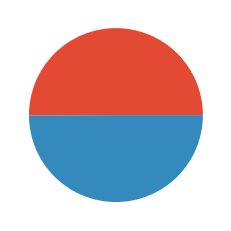

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font',family='Malgun Gothic')

plt.pie([m,f])
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text

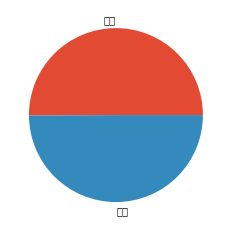

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font',family='Malgun Gothic')

plt.pie([m,f], labels=['남성', '여성'])
plt.show()

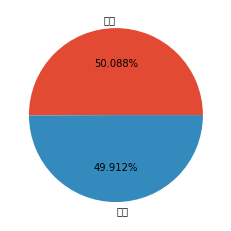

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font',family='Malgun Gothic')

plt.pie([m,f], labels=['남성', '여성'], autopct='%.3f%%')
plt.show()

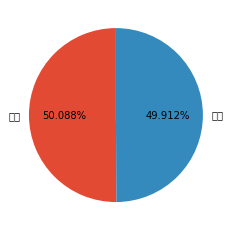

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font',family='Malgun Gothic')

plt.pie([m,f], labels=['남성', '여성'], autopct='%.3f%%', startangle=90) #앵글 바꾸기:90도  default: 0도
plt.show()

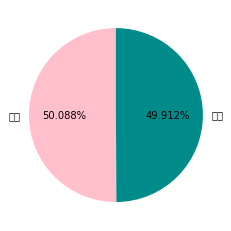

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font',family='Malgun Gothic')

plt.pie([m,f], labels=['남성', '여성'], autopct='%.3f%%', startangle=90, 
        colors=['pink', 'darkcyan']) #색깔 바꾸기
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52824 missing from current font.
  font.set_

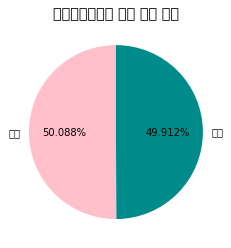

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font',family='Malgun Gothic')
plt.title(f'{name} 남여 성별 비율')

plt.pie([m,f], labels=['남성', '여성'], autopct='%.3f%%', startangle=90, 
        colors=['pink', 'darkcyan']) #색깔 바꾸기
plt.show()

> **[해석]**
> *   제주도의 남여 비율이 1:1
> *   연령대별 성별 비율은 어떻게 되는 걸까?

## line: 제주특별자치도 남여 인구 구조¶

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52824 missing from current font.
  font.set_

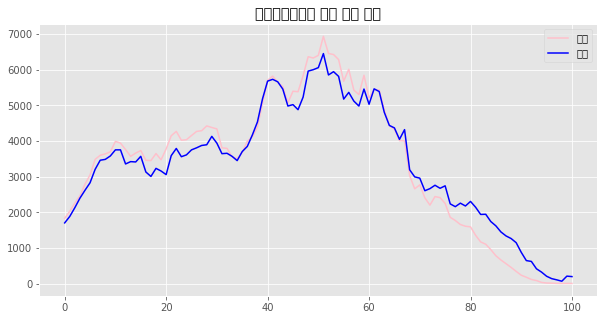

In [ ]:
from cProfile import label
from turtle import color
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/dev_work/population_new.csv',index_col=0, thousands = ',') # 컬럼0번째를 index_column으로 설정 

# 불필요한 데이터 삭제
del df['남_총인구수'], df['남_연령구간인구수']
del df['여_총인구수'], df['여_연령구간인구수']


#우리동네 데이터 추출
name = '제주특별자치도'
mytown = df[df.index.str.contains(name)] # 공백 데이터 처리

#남여 데이터 추출
male = mytown.iloc[0,0:101]
female = mytown.iloc[0,101:202]

# print(male.shape)


plt.figure(figsize=(10,5))
plt.style.use('ggplot')
plt.rc('font', family = "Malgun Gothic")
plt.rcParams['axes.unicode_minus']=False

plt.title('{} 남여 인구 구조'.format(name))


plt.plot(range(101),male, label='남성', color='pink')
plt.plot(range(101),female, label='여성', color='blue')



plt.legend()
plt.show()

> * 항아리 모양 그래프보다 남녀 인구의 차이가 눈에 더 잘 들어옵니다. 
> * 좀 더 차이가 한 눈에 들어오도록 한다면?

## bar:제주특별자치도 남여 인구 구조

* 남자-여자를 뺀 값으로  막대그래프 그려봄

### 데이터 로딩 및 전처리

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/dev_work/population_new.csv',index_col=0, thousands = ',') # 컬럼0번째를 index_column으로 설정 

# 불필요한 데이터 삭제
del df['남_총인구수'], df['남_연령구간인구수']
del df['여_총인구수'], df['여_연령구간인구수']


#우리동네 데이터 추출
name = '제주특별자치도'
mytown = df[df.index.str.contains(name)] # 공백 데이터 처리

#남여 데이터 추출
male = mytown.iloc[0,0:101]
female = mytown.iloc[0,101:202]

print(male-female)

# 남자-여자 연산 실패 --> index값이 같이 않아서...


남_0세        NaN
남_100세 이상   NaN
남_10세       NaN
남_11세       NaN
남_12세       NaN
             ..
여_96세       NaN
여_97세       NaN
여_98세       NaN
여_99세       NaN
여_9세        NaN
Name: 제주특별자치도  (5000000000), Length: 202, dtype: float64


In [ ]:
male.index

Index(['남_0세', '남_1세', '남_2세', '남_3세', '남_4세', '남_5세', '남_6세', '남_7세', '남_8세',
       '남_9세',
       ...
       '남_91세', '남_92세', '남_93세', '남_94세', '남_95세', '남_96세', '남_97세', '남_98세',
       '남_99세', '남_100세 이상'],
      dtype='object', length=101)

In [ ]:
female.index

Index(['여_0세', '여_1세', '여_2세', '여_3세', '여_4세', '여_5세', '여_6세', '여_7세', '여_8세',
       '여_9세',
       ...
       '여_91세', '여_92세', '여_93세', '여_94세', '여_95세', '여_96세', '여_97세', '여_98세',
       '여_99세', '여_100세 이상'],
      dtype='object', length=101)

In [ ]:
# 연산을 하기~
len(male.values - female.values)

101

In [ ]:
male.values - female.values

array([ 128,  145,  129,   66,  170,  221,  280,  139,  155,  115,  237,
        189,  403,  148,  249,  161,  327,  445,  415,  315,  719,  557,
        479,  462,  425,  402,  459,  414,  528,  249,  399,  163,  138,
        -15,   57,  -27,  145,  -55, -146, -112,   22,   90,  -16,   67,
         89,  375,  503,  601,  403,  327,  344,  483,  601,  481,  471,
        501,  648,  308,  321,  387,  178,  -22,   43,   70,   -6,  -37,
        -35, -316, -162, -335, -188, -199, -462, -317, -262, -493, -376,
       -388, -598, -568, -713, -786, -770, -840, -786, -838, -786, -778,
       -809, -805, -642, -467, -505, -330, -289, -190, -127,  -99,  -62,
       -204, -191])

### 남성에서 여성인구를 빼서 차이 정도를 시각화

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52824 missing from current font.
  font.set_

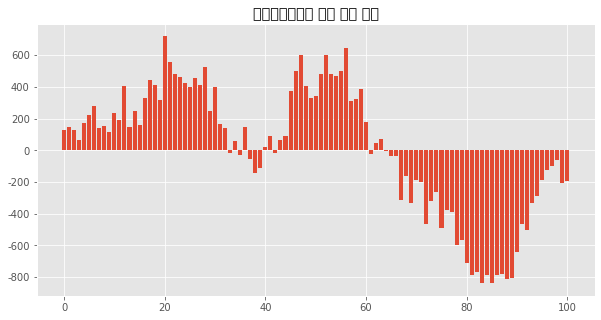

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/dev_work/population_new.csv',index_col=0, thousands = ',') # 컬럼0번째를 index_column으로 설정 

# 불필요한 데이터 삭제
del df['남_총인구수'], df['남_연령구간인구수']
del df['여_총인구수'], df['여_연령구간인구수']


#우리동네 데이터 추출
name = '제주특별자치도'
mytown = df[df.index.str.contains(name)] # 공백 데이터 처리

#남여 데이터 추출
male = mytown.iloc[0,0:101]
female = mytown.iloc[0,101:202]

#남-여 데이터 만들기
result = male.values - female.values 

plt.figure(figsize=(10,5))
plt.style.use('ggplot')
plt.rc('font', family = "Malgun Gothic")
plt.rcParams['axes.unicode_minus']=False

plt.title('{} 남여 인구 구조'.format(name))

plt.bar(range(101),result )
plt.show()

> * 60대를 기준으로 그 이하의 연령대는 남성이 많지만,
> * 60대 이상 인구는 여성이 많다는 것이 확연히 드러납니다. 

## scatter 차트

* 데이터의 관계를 파악하는 데 도움이 되는 산점도 그래프입니다. 
* 산점도는 가로축과 세로축을 기준으로 두 요소가 서로 어떤 관계를 맺고 있는지를 파악하기 쉽게 나타낸 그래프입니다. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/dev_work/population_new.csv',index_col=0, thousands = ',') # 컬럼0번째를 index_column으로 설정 

# 불필요한 데이터 삭제
del df['남_총인구수'], df['남_연령구간인구수']
del df['여_총인구수'], df['여_연령구간인구수']


#우리동네 데이터 추출
name = '제주특별자치도'
mytown = df[df.index.str.contains(name)] # 공백 데이터 처리

#남여 데이터 추출
male = mytown.iloc[0,0:101]
female = mytown.iloc[0,101:202]

#우리동네 연령별 총 인구수
total = []

for i in range(0,101):
    # print(mytown.iloc[0,i])
    total.append(mytown.iloc[0,i] + mytown.iloc[0,i+101])


    

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52824 missing from current font.
  font.set_

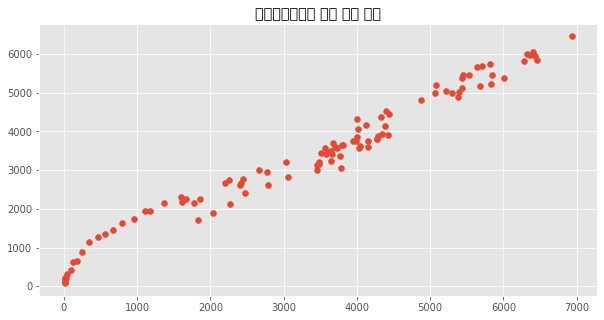

In [ ]:
plt.figure(figsize=(10,5))
plt.style.use('ggplot')
plt.rc('font', family = "Malgun Gothic")
plt.rcParams['axes.unicode_minus']=False

plt.title('{} 남여 인구 구조'.format(name))



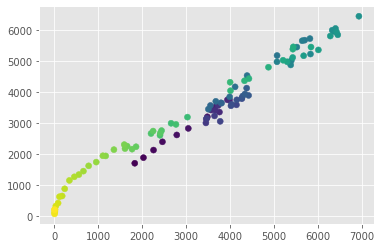

In [ ]:
plt.scatter(male, female, c=range(101)) #점 갯수만큼 색깔을 다르게 하겠다.

plt.show()

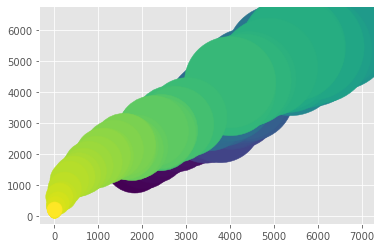

In [ ]:
plt.scatter(male, female, c=range(101), s=total) #데이터 포인트의 크기 조정(인구의 총합)

plt.show()

In [ ]:
total[:5]

[3542, 3921, 4395, 4864, 5412]

In [ ]:
import math

size =[]

for i in range(101):
  # print()
  # print(math.sqrt(total[i]))
  size.append(math.sqrt(total[i])) #sqrt 쓰는 이유: 데이터값의 크기를 줄이기 위해서

In [ ]:
size[:5]

[59.51470406546604,
 62.617888817813075,
 66.29479617586888,
 69.74238309665078,
 73.56629663099808]

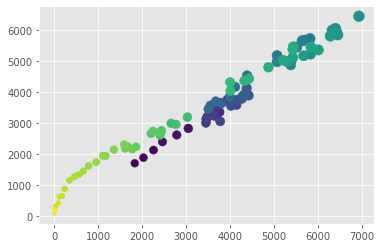

In [ ]:
plt.scatter(male, female, c=range(101), s=size) #데이터 포인트의 크기 조정(인구의 총합)

plt.show()

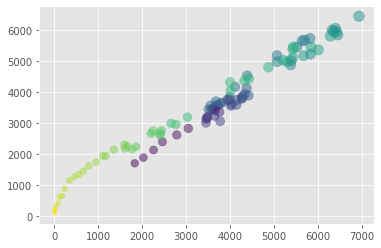

In [ ]:
plt.scatter(male, female, c=range(101), s=size, alpha=0.5) # 투명도 조절
plt.show()

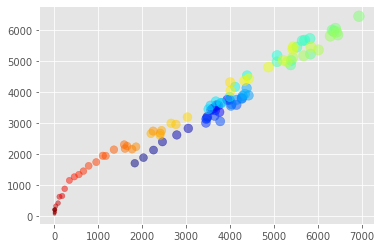

In [ ]:
plt.scatter(male, female, c=range(101), s=size, alpha=0.5, cmap='jet') # 투명도 조절
plt.show()

In [ ]:
max(male), max(female)

(6935, 6452)

In [ ]:
min(male), min(female)

(10, 72)

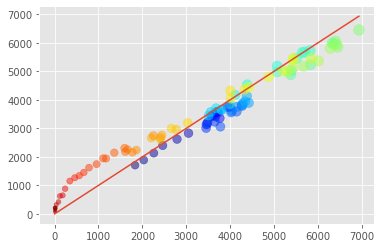

In [ ]:
plt.scatter(male, female, c=range(101), s=size, alpha=0.5, cmap='jet') # 컬러맵

plt.plot(range(max(male)), range(max(male))) #추세선 넣기 Y=x 형태로
plt.show()